# **Summary**


---


Data yang digunakan yakni dataset Hotel Reviews. Data diambil dari web kaggle. Data ini berisi review dan rating yang diberikan pelanggan dari aplikasi TripAdvisor terhadap hotel J.W Marriot. Data ini mempunyai 20492 baris.

Lucky Team akan menganalisis data yang bersumber dari kaggle.com berdasarkan review dan rating dari pengguna di TripAdvisor dengan cara memprediksi sentimen. Melalui ulasan tersebut, sentimen akan dibagi menjadi 3, yaitu negatif (bintang 1; bintang 2), netral (bintang 3) dan positif (bintang 4; bintang 5) yang outputnya adalah persentase dari kecenderungan prediksi sentimen tersebut. Maka, dengan adanya hasil analisis ini diharapkan dapat meningkatkan kualitas pelayanan dan fasilitas dari Hotel Dummy.






# **1. Library**


---


### **Install Library**

In [ ]:
!pip install nltk
!pip install regex
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=b304fadabc1e34ef6376ca4e8a377ba09b26fd8a60618bc8f5f8ae1b9a545b98
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


## **Import Library**

In [ ]:
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import plotly.express as px

nltk.download('stopwords')
nltk.download ('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem.snowball import SnowballStemmer 
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS

words = set(nltk.corpus.words.words())
stopwords = set(stopwords.words('english'))
stopwordsUpdated = set(STOPWORDS)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
words

# **2. Data Preprocessing**

---



In [ ]:
stopwords

**connect google drive to google colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**import data**

In [ ]:
hotel = pd.read_csv('/content/drive/MyDrive/MBKM/J.W.Marriott hotel reviews.csv')

**membuat dataframe cleanReview**

In [ ]:
hotel['cleanReview'] = pd.DataFrame(hotel['Review'])

In [ ]:
hotel.head()

,Review,Rating,Sentiment,Count_Word,Count_Char,Date,cleanReview
0,nice hotel expensive parking got good deal sta...,4,Positive,87,593,9/7/2021,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,250,1689,9/2/2020,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,217,1427,7/31/2020,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,89,600,10/25/2021,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,Positive,191,1281,2/13/2021,"great stay great stay, went seahawk game aweso..."


**cek data**

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review       20491 non-null  object
 1   Rating       20491 non-null  int64 
 2   Sentiment    20491 non-null  object
 3   Count_Word   20491 non-null  int64 
 4   Count_Char   20491 non-null  int64 
 5   Date         20491 non-null  object
 6   cleanReview  20491 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


## **Data Cleansing**

---






### **Missing Value**

**Detecting the Missing Value**

In [ ]:
hotel.isnull()

,Review,Rating,Sentiment,Count_Word,Count_Char,Date,cleanReview
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
20486,False,False,False,False,False,False,False
20487,False,False,False,False,False,False,False
20488,False,False,False,False,False,False,False
20489,False,False,False,False,False,False,False


**Summarizing the Missing Value**

In [ ]:
hotel.isnull().sum()

NameError: ignored

###**Duplicate Value**

**Summarizing the Duplicate Value**

In [ ]:
hotel.duplicated().sum()

0

# **3. Text Preprocessing**
---



**Case Folding**

In [ ]:
hotel['cleanReview'] = hotel['cleanReview'].str.lower()

In [ ]:
hotel.head()

,Review,Rating,Sentiment,Count_Word,Count_Char,Date,cleanReview
0,nice hotel expensive parking got good deal sta...,4,Positive,87,593,9/7/2021,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,250,1689,9/2/2020,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,217,1427,7/31/2020,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,89,600,10/25/2021,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,Positive,191,1281,2/13/2021,"great stay great stay, went seahawk game aweso..."


**Remove Number**

In [ ]:
def remove_number(text):
    return  re.sub(r"\d+","", text)

hotel['cleanReview'] = hotel['cleanReview'].apply(remove_number)

In [ ]:
hotel.head()

,Review,Rating,Sentiment,Count_Word,Count_Char,Date,cleanReview
0,nice hotel expensive parking got good deal sta...,4,Positive,87,593,9/7/2021,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,250,1689,9/2/2020,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,217,1427,7/31/2020,nice rooms not * experience hotel monaco seatt...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,89,600,10/25/2021,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,Positive,191,1281,2/13/2021,"great stay great stay, went seahawk game aweso..."


**Remove Punctuation**

In [ ]:
def remove_punctuation(text):
    clean_punct = "".join(u for u in text if u not in("?", ".", ",", ";", ":", '"', "'"))
    return clean_punct
hotel['cleanReview'] = hotel['cleanReview'].apply(remove_punctuation)


hotel.iloc[[20]]

,Review,Rating,Sentiment,Count_Word,Count_Char,Date,cleanReview
20,service service service spent week g-friend la...,5,Positive,171,1190,5/29/2021,service service service spent week g-friend la...


**Remove Symbols**

In [ ]:
def remove_symbols(text):
  clean_symbols = re.sub(r"[^a-z]+",' ', text)
  return clean_symbols

hotel['cleanReview'] = hotel['cleanReview'].apply(remove_symbols)

In [ ]:
hotel.head()

,Review,Rating,Sentiment,Count_Word,Count_Char,Date,cleanReview
0,nice hotel expensive parking got good deal sta...,4,Positive,87,593,9/7/2021,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,250,1689,9/2/2020,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,217,1427,7/31/2020,nice rooms not experience hotel monaco seattle...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,89,600,10/25/2021,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,191,1281,2/13/2021,great stay great stay went seahawk game awesom...


**Remove Meaningless**

In [ ]:
def remove_meaningless(text):
  clean_meaningless = " ".join(u for u in nltk.wordpunct_tokenize(text) if u in words or not u.isalpha())
  return clean_meaningless

hotel['cleanReview'] = hotel['cleanReview'].apply(remove_meaningless)

hotel.head(1)


,Review,Rating,Sentiment,Count_Word,Count_Char,Date,cleanReview
0,nice hotel expensive parking got good deal sta...,4,Positive,87,593,7/31/2021,nice hotel expensive parking got good deal sta...


**Remove Stopwords**

In [ ]:
hotel['cleanReview'] = hotel['cleanReview'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

hotel.head(1)

,Review,Rating,Sentiment,Count_Word,Count_Char,Date,cleanReview
0,nice hotel expensive parking got good deal sta...,4,Positive,87,593,7/31/2021,nice hotel expensive parking got good deal sta...


**Stemming and Lemmatizing**

In [ ]:
# Use English stemmer.
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

def snowballstemmer(text):
  text = ' '.join(stemmer.stem(word) for word in text.split() if word in text)

def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

hotel['cleanReview'] = hotel['cleanReview'].apply(lemmatize_words)

hotel.head(6)

NameError: ignored

In [ ]:
hotel.iloc[[20]]

,Review,Rating,Sentiment,Count_Word,Count_Char,Date,cleanReview
20,service service service spent week g-friend la...,5,Positive,171,1190,4/29/2020,service service service spend week g friend la...


# **4. Modelling**


---



**Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hotel['cleanReview'], hotel['Sentiment'], test_size = 0.05,random_state = 12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19466,), (1025,), (19466,), (1025,))

**TF-IDF**

In [ ]:
tfidf = TfidfVectorizer()
data_train = tfidf.fit_transform(X_train)
data_test = tfidf.transform(X_test)

**Logistic Regression**

In [ ]:
model = LogisticRegression(max_iter = 2000, solver = 'lbfgs', verbose = 1)
model.fit(data_train, y_train)

predict = model.predict(data_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished


In [ ]:
model.score(data_train, y_train), model.score(data_test, y_test)

(0.8922223363813829, 0.864390243902439)

**Confusion Matrix**

In [ ]:
print(confusion_matrix(y_test,predict))

[[119   9  34]
 [ 16  16  60]
 [ 11   9 751]]


In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

    Negative       0.82      0.73      0.77       162
     Neutral       0.47      0.17      0.25        92
    Positive       0.89      0.97      0.93       771

    accuracy                           0.86      1025
   macro avg       0.72      0.63      0.65      1025
weighted avg       0.84      0.86      0.84      1025



# **5. Visualisasi**


---



In [ ]:
hotel2 = hotel[hotel.Sentiment == 'Negative']

In [ ]:
hotel2.head()

,Review,Rating,Sentiment,Count_Word,Count_Char,Date,cleanReview
1,ok nothing special charge diamond member hilto...,2,Negative,250,1689,9/2/2020,nothing special charge diamond member decide c...
10,"poor value stayed monaco seattle july, nice ho...",2,Negative,47,333,11/6/2020,poor value stay nice hotel price night hotel b...
15,horrible customer service hotel stay february ...,1,Negative,214,1413,1/22/2020,horrible customer service hotel stay th friend...
16,disappointed say anticipating stay hotel monac...,2,Negative,242,1662,7/3/2021,disappoint say stay hotel base see definitely ...
24,great location need internally upgrade advanta...,2,Negative,35,250,6/10/2022,great location need internally upgrade advanta...


**Wordcloud**

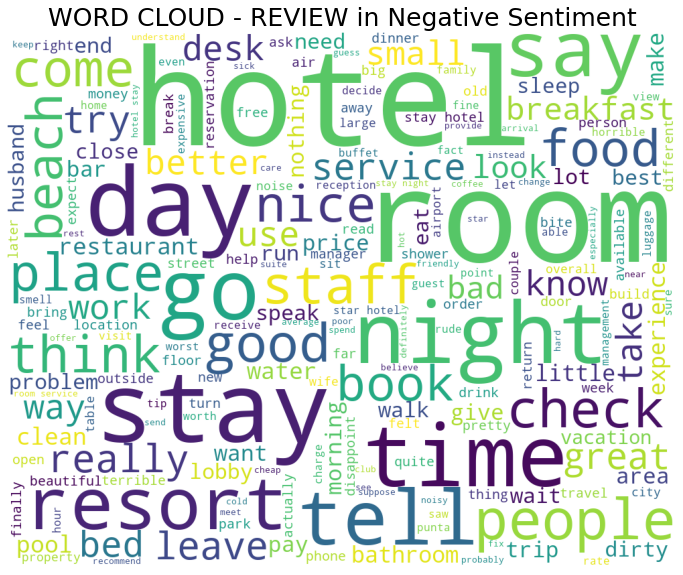

In [ ]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwordsUpdated,
    max_words=200,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(hotel2['cleanReview'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - REVIEW in Negative Sentiment",fontsize=25)
plt.axis('off')
plt.show()

**NGram**

In [ ]:
mostUsedWords = hotel2['cleanReview'].str.split(expand=True).stack().value_counts()
mostUsedWords_top100 = mostUsedWords[:100]

fig = px.treemap(mostUsedWords_top100, path=[mostUsedWords_top100.index], values=0)
fig.update_layout(title_text='The 100 Most Frequest Words in Negative Sentiment',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [ ]:
def get_top_n_gram(corpus, n=None, gram=None):
  vec = CountVectorizer(ngram_range=(gram, gram)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

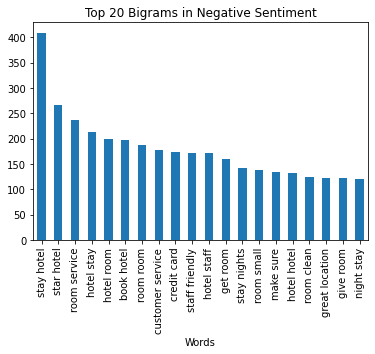

In [ ]:
#bigram
common_words = get_top_n_gram(hotel2['cleanReview'], 20,2)
#for word, freq in common_words :
#  print(word,freq)
ngram = pd.DataFrame(common_words, columns = ['Words','count'])
plt.rcParams['font.size']='10'
ngram.groupby('Words').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', x='count', y='words', title='Top 20 Bigrams in Negative Sentiment')
plt.show()

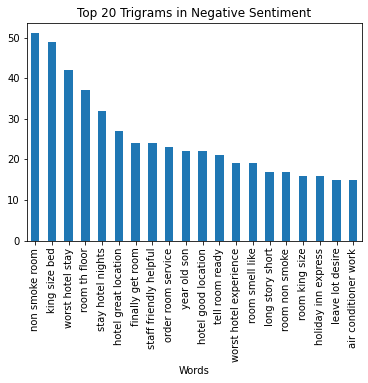

In [ ]:
#trigram
common_words = get_top_n_gram(hotel2['cleanReview'], 20,3)
#for word, freq in common_words :
#  print(word,freq)
ngram = pd.DataFrame(common_words, columns = ['Words','count'])
plt.rcParams['font.size']='10'
ngram.groupby('Words').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', x='count', y='words', title='Top 20 Trigrams in Negative Sentiment')
plt.show()

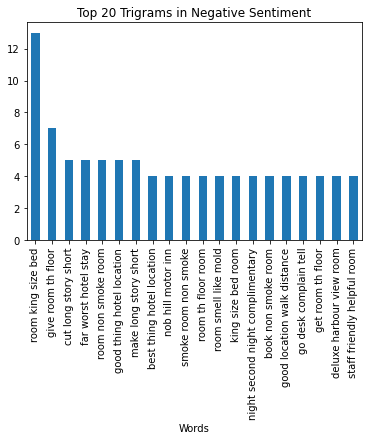

In [ ]:
#trigram
common_words = get_top_n_gram(hotel2['cleanReview'], 20,4)
#for word, freq in common_words :
#  print(word,freq)
ngram = pd.DataFrame(common_words, columns = ['Words','count'])
plt.rcParams['font.size']='10'
ngram.groupby('Words').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', x='count', y='words', title='Top 20 Trigrams in Negative Sentiment')
plt.show()